#  Data Cleaning &  Analysis

In [1]:
#load the libraries
import pandas as pd


In [2]:
data = pd.read_csv("data_clean.csv")# reading csv file


# write a code with absolute path 

In [75]:
databkup=data

In [7]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [8]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [9]:
data.tail(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
148,149,30.0,193.0,6.9,70,9,26,2010,70,C
149,150,NaN,145.0,13.2,77,9,27,2010,77,PS
150,151,14.0,191.0,14.3,75,9,28,2010,75,S
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [10]:
#Data Structure 
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [11]:
data.shape # show dimension 158 rows and 10 columns 

(158, 10)

In [12]:
#data types
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [13]:
data.describe() # display statistics but only for numeric

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


### Here we see that for Ozone - 120 is shown in count - that means 38 missing values.

### This is comment

# Data type conversion

In [14]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

as we can see that month is showing up as objects, which should ideally have been integer, it means something is fishy with month

Sometimes few of the data points have wrong values and we cant didn't find it during EDA.

during machine learning model, it through error, as it is string and expected as numbers.

like here month, should have been numeric value, so we convert from object to numeric.

In [19]:
pd.to_numeric(data['Month'])

ValueError: Unable to parse string "May" at position 23

As we can see that is May showing up in one row which caused above error.
See 23rd index shows value as May and not 5 below.

In [18]:
data['Month'].head(25)

0       5
1       5
2       5
3       5
4       5
5       5
6       5
7       5
8       5
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      5
17      5
18      5
19      5
20      5
21      5
22      5
23    May
24      5
Name: Month, dtype: object

In [22]:
data["Month"] = pd.to_numeric(data['Month'], errors='coerce') # errors = 'coerce' will convert invalid parsing to NaN
data["Temp C"] = pd.to_numeric(data['Temp C'], errors='coerce')
data["Weather"] = data['Weather'].astype('category') # converting to category datatype

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


# Checking Duplicates

In [25]:
data.duplicated() # returns boolean series denoting duplicate rows

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [27]:
# Counting the number of duplicate rows
data[data.duplicated()].shape

(0, 10)

This means there are no duplicate values

In [28]:
data[data.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


In [29]:
data = data.drop_duplicates() # removing duplicate rows
data.shape

(158, 10)

## Convert String to datetime

In [30]:
import pandas as pd
from datetime import datetime

# Input string
date_string = "28 January 2024"

# Convert string to datetime using pandas
pd_dt = pd.to_datetime(date_string)
print(pd_dt)
print(date_string)

2024-01-28 00:00:00
28 January 2024


In [31]:
# Format the datetime object using strftime
formatted_date = pd_dt.strftime("%d/%b/%Y")

print("Original String:", date_string)
print("Formatted Date:", formatted_date)

Original String: 28 January 2024
Formatted Date: 28/Jan/2024


# Drop columns

In [32]:
# Drop unnecessary column

In [33]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [34]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S


In [35]:
data=data.drop('Unnamed: 0',axis=1) # axis= 1 for column

In [36]:
# To check whether dropped or not
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S


In [37]:
databkup

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


## Apna time aayega -- Write a code to drop a column Temp C

as it seems like both temp and temp C columns seem to have same data so lets drop Temp C column

In [38]:
data.head(6)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
5,28.0,NaN,14.9,66.0,5.0,6,2010,66,C


In [39]:
data = data.drop('Temp C', axis=1)  # Dropping 'Temp C' column

In [40]:
data.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


## How to Rename the Columns

In [41]:
data = data.rename({'Solar.R':'Solar'}, axis=1)  # Renaming 'Solar.R' to 'Solar'

In [42]:
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S


## How to find Missing Values?

In [44]:
cols = data.columns
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

<Axes: >

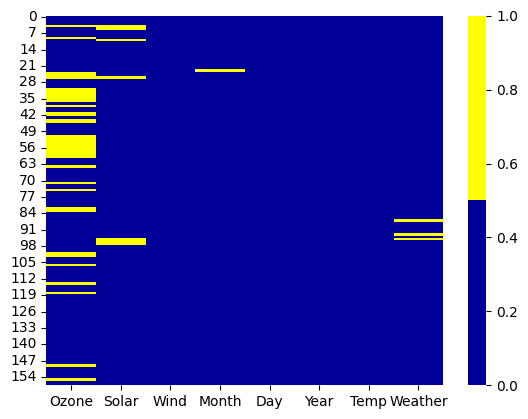

In [48]:
import seaborn as sns
cols = data.columns
colours = ['#000099', '#ffff00']  # specify the colors yellow for missing values and blue for non-missing values
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

## How to check null values present in specific column or not

In [49]:
data['Month'].isnull().sum()

np.int64(1)

In [50]:
data['Ozone'].isnull()

0      False
1      False
2      False
3      False
4       True
       ...  
153    False
154    False
155     True
156    False
157    False
Name: Ozone, Length: 158, dtype: bool

### First check whether Ozone has outlier or not
- best to use boxplot to find outliers

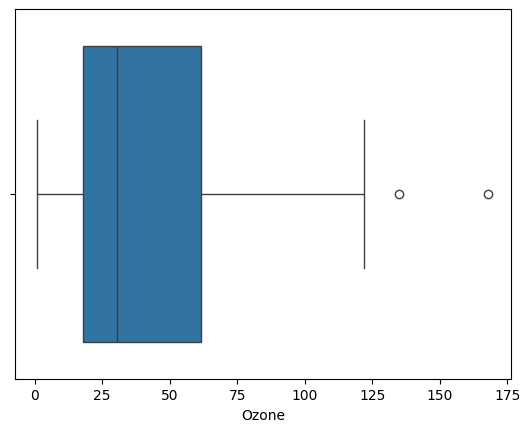

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check outliers in 'Ozone' column
sns.boxplot(x=data['Ozone'])
plt.show()

so it seems like there are 2 outliers, we can find their approximate values as well

and as there are outliers, we will do Nan values replacement with median value

Still we can confirm with one statistical method

In [58]:
# Calculate Q1 and Q3
Q1 = data['Ozone'].quantile(0.25)
Q3 = data['Ozone'].quantile(0.75)
IQR = Q3 - Q1  # interquartile range

#determine the outlier cutoff values
lower_bound = Q1 - 1.5 * IQR    
upper_bound = Q3 + 1.5 * IQR

#find outliers
outliers = data[(data['Ozone'] < lower_bound) | (data['Ozone'] > upper_bound)]

print("Number of outliers in 'Ozone':", outliers.shape[0])


Number of outliers in 'Ozone': 2


In [53]:
data['Solar'].isnull().sum()

np.int64(7)

Hence as per strategy, we will replace Solar na vlues with median

In [59]:
ozone_median = data['Ozone'].median()
data['Ozone'].fillna(ozone_median, inplace=True)

print('Filled with median:', ozone_median)

Filled with median: 30.5


C:\Users\Amey\AppData\Local\Temp\ipykernel_11272\3028309690.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ozone'].fillna(ozone_median, inplace=True)


In [60]:
#check the missing ozone values after filling
data['Ozone'].isnull().sum()

np.int64(0)

# Now lets check for solar column

In [ ]:
data['Solar'].isna().sum() # i.e 7 na values are there in Solar column

np.int64(7)

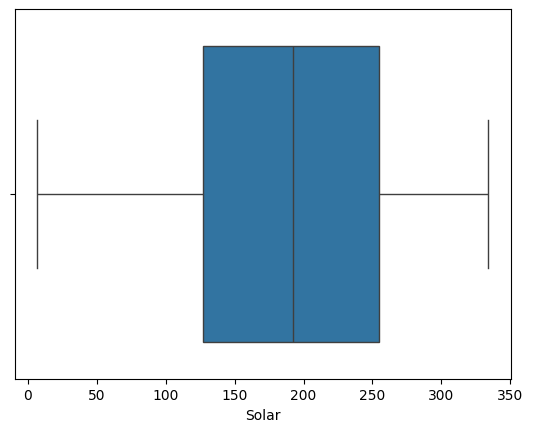

In [65]:
# now lets check box plot for solar column to see if there are any outliers
import seaborn as sns
sns.boxplot(x=data['Solar'])
plt.show()
# as we can see there are no outliers in solar column so we can go ahead with mean imputation
solar_mean = data['Solar'].mean()
data['Solar'].fillna(solar_mean, inplace=True)

In [66]:
data['Solar'].isnull().sum()

np.int64(0)

# Now lets check for Weather Column

as it is categorical column, so we will need to use Mode here

In [67]:
data['Weather'].isnull().sum()

np.int64(3)

In [70]:
mode_value = data['Weather'].mode()[0]
mode_value

'S'

In [ ]:
data['Weather'] = data['Weather'].fillna(mode_value)


In [73]:
data['Weather'].isnull().sum()

np.int64(0)

In [55]:
data.isnull().sum() #  to display all columns  na count 

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

## Missing Value Treatment

How to handle (impute) missing (nan) values

Common Methods to Handle missing Values

Strategy               When to Use

Mean           -        For normal distribution, no outliers

Median          -     For skewed data, with outliers

Mode             -      For Categorical data

In [32]:
# Deleting the missing values - dropna()

In [33]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [34]:
data.dropna(axis=0)

# all rows having na will be dropped , 
# Not recommended. use only when many columns having na in same row 
# or less than 10 % of data in large dataset or avoid in small size dataset

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
6,23.0,299.0,8.6,65,5,7,2010,65,PS
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68,9,30,2010,68,S
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
156,14.0,191.0,14.3,75,9,28,2010,75,S


## imputing missing values fillna()

In [35]:
data.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [36]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [37]:
data.isnull().sum() # to check how many na in each column

Ozone      38
Solar.R     7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [38]:
data['Ozone']=data['Ozone'].fillna(0)

In [39]:
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [40]:
data.Ozone=data.Ozone.fillna(0) # fill na with 0

In [41]:
data.isnull().sum() 

Ozone      0
Solar.R    7
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [42]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,0.0,NaN,14.3,56,5,5,2010,56,S


In [43]:
z=data['Solar.R'].mean()

In [44]:
print(z)

185.40397350993376


In [45]:
solar_mean=data['Solar.R'].mean()

In [46]:
data['Solar.R']=data['Solar.R'].fillna(solar_mean)

In [47]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,67,5,1,2010,67,S
1,36.0,118.000000,8.0,72,5,2,2010,72,C
2,12.0,149.000000,12.6,74,5,3,2010,74,PS
3,18.0,313.000000,11.5,62,5,4,2010,62,S
4,0.0,185.403974,14.3,56,5,5,2010,56,S


In [48]:
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [49]:
data_bkup.isnull().sum()

NameError: name 'data_bkup' is not defined

In [ ]:
# restart 

In [ ]:
data.isnull().sum()

In [ ]:
data['Weather']

In [ ]:
type(data['Weather'].mode())

In [ ]:
z=data['Weather'].mode()
print(z)

In [ ]:
# z=data['Weather'].mode().iloc[0]
# print(z)

In [ ]:
data['Weather']=data['Weather'].fillna(z)

In [ ]:
data.isnull().sum() # to check na present in Weather fields

In [ ]:
data.to_csv('formated.csv')

### Extra code only for reference

## How to get original data or starting point data in data object ?

In [78]:
data=databkup #

In [79]:
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S


In [80]:
data_temp=data.fillna(method='ffill')

C:\Users\Amey\AppData\Local\Temp\ipykernel_11272\3428144185.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_temp=data.fillna(method='ffill')


In [81]:
data_temp.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S


In [82]:
data.head(5)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S


In [83]:
data.dtypes

Ozone       float64
Solar       float64
Wind        float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [84]:
# use method=bfill for backward fill

In [85]:
data.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# Rename the columns

In [ ]:
data.head()

In [ ]:
#rename the Solar column
data = data.rename({'Solar.R': 'Solar'}, axis=1) # 1 means column 

In [ ]:
data

## Save dataframe(Modified data) to Files

In [ ]:
data.to_csv('formated.csv')

# Seaborn Correlation anaysis and Scatter plot

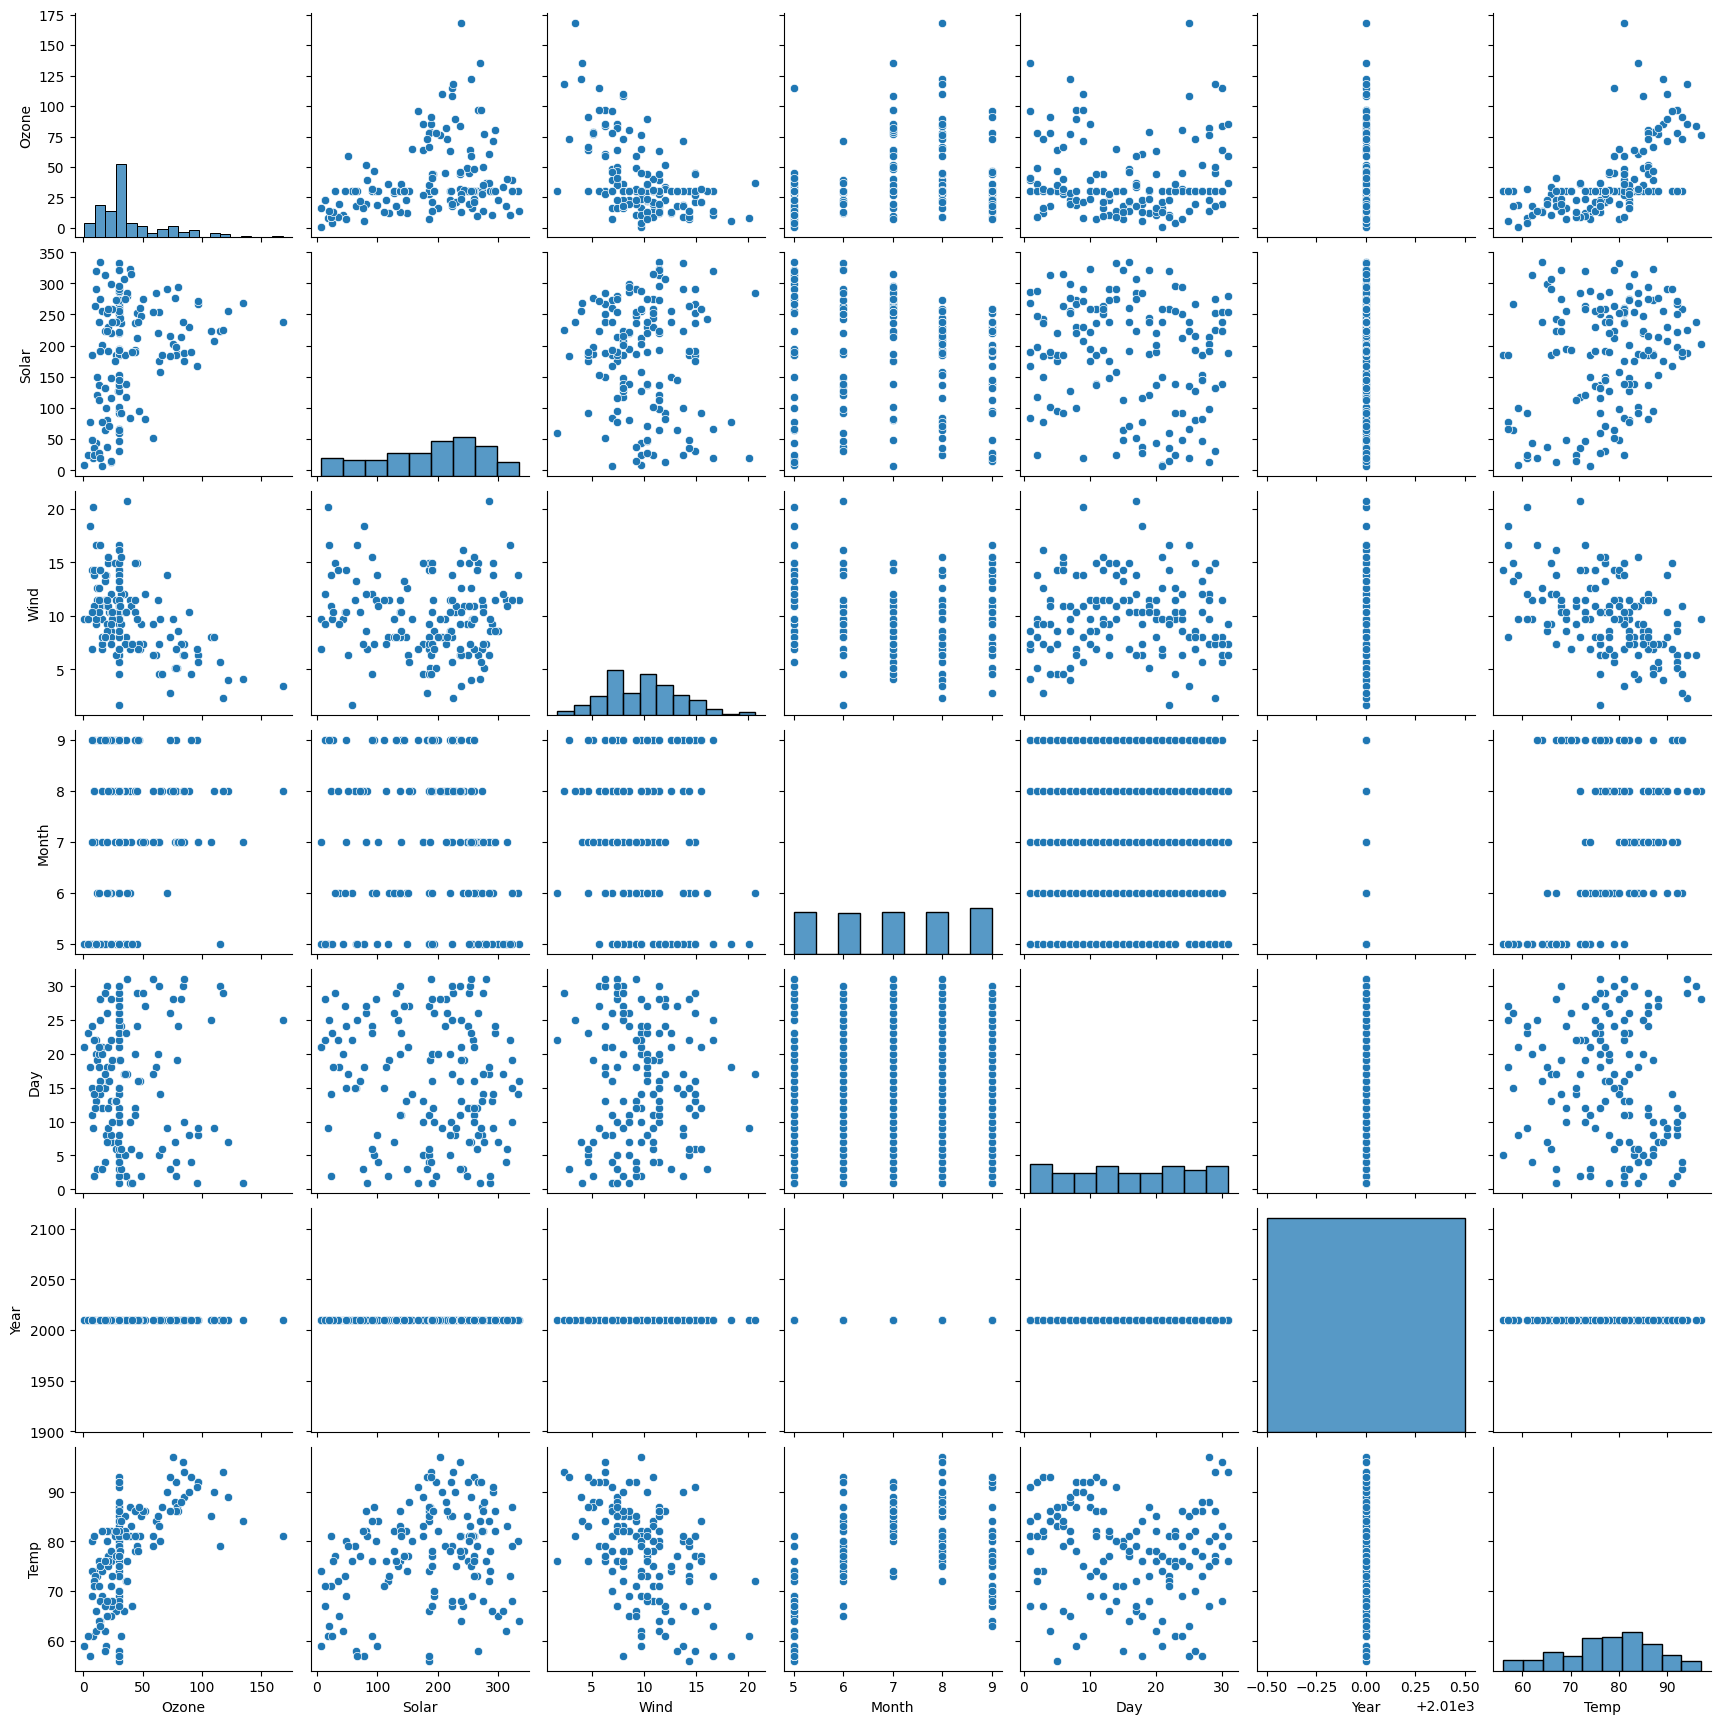

In [86]:
import seaborn as sns
sns.pairplot(data)

This is basically showing scatter plot between all variables.

Here one can see relation between 2 different variables like Ozone with Temp, Solar with Temp etc.

One can check with positive or negative co-relation  or neutral and also linear or non linear

In [87]:
data.select_dtypes(include=['number']).corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.296085,-0.526616,0.162893,-0.039298,NaN,0.596304
Solar,0.296085,1.000000,-0.055092,-0.089856,-0.149606,NaN,0.260473
Wind,-0.526616,-0.055092,1.000000,-0.153507,0.040151,NaN,-0.441247
Month,0.162893,-0.089856,-0.153507,1.000000,0.061236,NaN,0.393321
Day,-0.039298,-0.149606,0.040151,0.061236,1.000000,NaN,-0.124538
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.596304,0.260473,-0.441247,0.393321,-0.124538,NaN,1.000000


Here co relation value like Temp with Ozone is 0.69, which shows positive corelation.

Similarly there is negative corelation between wind and ozone, -0.59, which is more

### If 2 variables are highly corelated, one of it need to be removed, so that is why we are cheking correlation

#### What is Dummy Variable?

A dummy variable is a numeric (0/1) representation of categorical data in machine learning and statistical models.


### Why is it required?
- Most algorithms cannot understand text - they need numbers.
- Dummy variables convert categories into binary format, allowing models to process them effectively.
- For example, a column Gender with values Male and Female becomes:
- - Gender Male , Gender Female
- - 1 , 0 
- - 0 , 1

In [88]:
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S


In [91]:
data['Weather'].value_counts()

Weather
S     62
C     49
PS    47
Name: count, dtype: int64

as we can see it has 3 values, so we need to create dummy variables for this

In [92]:
data = pd.get_dummies(data, columns=['Weather'])

In [93]:
data

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5.0,1,2010,67,False,False,True
1,36.0,118.000000,8.0,5.0,2,2010,72,True,False,False
2,12.0,149.000000,12.6,5.0,3,2010,74,False,True,False
3,18.0,313.000000,11.5,5.0,4,2010,62,False,False,True
4,30.5,185.403974,14.3,5.0,5,2010,56,False,False,True
...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.000000,7.4,5.0,1,2010,67,True,False,False
154,30.0,193.000000,6.9,9.0,26,2010,70,False,True,False
155,30.5,145.000000,13.2,9.0,27,2010,77,False,False,True
156,14.0,191.000000,14.3,9.0,28,2010,75,False,False,True


In [ ]:
# in some systems rather that to convert it into 1/0 - it converts into True/False


If Weather_C, Weather_PS, Weather_S columns shows values like true, false, we use below code

In [99]:
data = databkup
# fill na with mean for Weather column
data['Weather'].fillna(data['Weather'].mode(), inplace=True)
data['Weather'].isna().sum()

np.int64(0)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    158 non-null    float64 
 1   Solar    158 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Month    157 non-null    float64 
 4   Day      158 non-null    int64   
 5   Year     158 non-null    int64   
 6   Temp     158 non-null    int64   
 7   Weather  158 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 9.1 KB


In [ ]:
data = pd.get_dummies(data, columns=['Weather']).astype(int)

KeyError: "None of [Index(['Weather'], dtype='object')] are in the [columns]"

In [107]:
data.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5.0,1,2010,67,False,False,True
1,36.0,118.000000,8.0,5.0,2,2010,72,True,False,False
2,12.0,149.000000,12.6,5.0,3,2010,74,False,True,False
3,18.0,313.000000,11.5,5.0,4,2010,62,False,False,True
4,30.5,185.403974,14.3,5.0,5,2010,56,False,False,True


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ozone       158 non-null    float64
 1   Solar       158 non-null    float64
 2   Wind        158 non-null    float64
 3   Month       157 non-null    float64
 4   Day         158 non-null    int64  
 5   Year        158 non-null    int64  
 6   Temp        158 non-null    int64  
 7   Weather_C   158 non-null    bool   
 8   Weather_PS  158 non-null    bool   
 9   Weather_S   158 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 9.2 KB


# Normalization of the data

Normalization is a technique used in data preprocession to scale the values of numerical features to a specific range. This ensires that no feather dominates others purely due to its scale, which is especially important for machine learning algorithms sensitive to feature magnitudes (eg - gradient descent, k-NN)

2 common normalization techniques are StandardScaler and MinMaxScaler

In [111]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


In [113]:
data.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [119]:
data[['Weather_PS','Weather_S','Weather_C']] = data[['Weather_PS','Weather_S','Weather_C']].astype(int)
data.head()


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,5.0,1,2010,67,0,0,1
1,36.0,118.000000,8.0,5.0,2,2010,72,1,0,0
2,12.0,149.000000,12.6,5.0,3,2010,74,0,1,0
3,18.0,313.000000,11.5,5.0,4,2010,62,0,0,1
4,30.5,185.403974,14.3,5.0,5,2010,56,0,0,1


In [120]:
array = data.values

In [121]:
array

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30.5, 145. ,  13.2, ...,   0. ,   0. ,   1. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]], shape=(158, 10))

In [122]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(array)

In [123]:
set_printoptions(precision=2)
print(rescaledX)

[[0.24 0.56 0.3  ... 0.   0.   1.  ]
 [0.21 0.34 0.33 ... 1.   0.   0.  ]
 [0.07 0.43 0.57 ... 0.   1.   0.  ]
 ...
 [0.18 0.42 0.61 ... 0.   0.   1.  ]
 [0.08 0.56 0.66 ... 0.   0.   1.  ]
 [0.1  0.38 0.33 ... 1.   0.   0.  ]]


### Key Differences between Standard Scaler and MinMaxScaler are :

StandardScaler - 
- Purpose - Centers and scales data (mean = 0 and std = 1).
- Effect - Removed mean and variance differences.
- Output Range - Not fixed, depends on data distributions.
- Sensitivity - Affected by outliers but less so than MinMaxScalar.
- UseCase - For algorithms sensitive to variance or normality..

MinMaxScaler - 
- Purpose - Scales data to a fixed range (ex - [0,1])
- Effect - Compresses data into the specified range.
- Output Range - Fixed, typically [0,1] or custom range.
- Sensitivity - Highly sensitive to outliers.
- For algorithms needing uniform range of values.

In [124]:
from sklearn.preprocessing import StandardScaler


In [126]:
array = data.values
array
scaler = StandardScaler()
scaler.fit(array)
rescaledX = scaler.transform(array)
rescaledX

array([[ 0.07,  0.05, -0.73, ..., -0.67, -0.65,  1.24],
       [-0.1 , -0.78, -0.56, ...,  1.49, -0.65, -0.8 ],
       [-0.94, -0.42,  0.75, ..., -0.67,  1.54, -0.8 ],
       ...,
       [-0.29, -0.47,  0.93, ..., -0.67, -0.65,  1.24],
       [-0.87,  0.06,  1.24, ..., -0.67, -0.65,  1.24],
       [-0.73, -0.63, -0.56, ...,  1.49, -0.65, -0.8 ]], shape=(158, 10))

Here data has been normalized this data is generalized.

Hence it can be used, for furthern modeling where , model will not be baised on any feather.

# EDA - Part 2

Data Transformation

Feature Engineering

Exploration Insights

Feature Selection

Data Preprocession in insurance industry